<a href="https://colab.research.google.com/github/daoslies/Cur_Tea/blob/main/Cur_Tea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# NOTES
# Learning shit

# last time- hoooking up gradients -- needs fin

# amount of days alive as reinforcement mechanism

# LOSS LOSS LOSS LOSS LOSS LOSS LOSS LOSS LOS LOSS LOSS LOSS LOSS LOSS LOSS LOSS 
# curent - train every step of jouney -- Doesn't have to! :O - tho one training step/ session and only based on final decision.

# hunger > 5
# thirst > 7

In [5]:
# IMPORTS

import random
import numpy as np
import matplotlib.pyplot as plt


import torch
from torch import nn


In [6]:
## TEA


earlGrey = { 'Name' : 'Earl Grey', 
         'Thirst' : 10,
         'Hunger' : 0,
         'Health' : 5}


godsTear = { 'Name' : "God's Tear", 
         'Thirst' : 10,
         'Hunger' : 0,
         'Health' : 0}


builder = { 'Name' : "Builder's Tea", 
         'Thirst' : 5,
         'Hunger' : 0,
         'Health' : 0}


coffee = { 'Name' : 'Coffee', 
         'Thirst' : -1,
         'Hunger' : 2,
         'Health' : 5}


liqGin = { 'Name' : 'Liquorice & Ginger', 
         'Thirst' : -5,
         'Hunger' : -2,
         'Health' : -1}


tea_menu = [earlGrey, godsTear, builder, coffee, liqGin]







### PEOPLE

linus = { 'Name' : 'Linus', 
         'Age' : 23,
         'Religion' : 'Catholic',
         'Thirst' : 1}

adrian = { 'Name' : 'Adrian', 
         'Age' : 1322,
         'Religion' : 'Prince Philip Movement',
         'Thirst' : 1}

damo = { 'Name' : 'Damo', 
         'Age' : 23,
         'Religion' : 'Buddhism',
         'Thirst' : 1}

prince_phil = { 'Name' : 'Prince Philip', 
                'Age' : 110,
                'Religion' : 'Protestant',
         'Thirst' : 1}

people_list = [linus, adrian, damo, prince_phil]

In [72]:
from torch.nn.modules.activation import Tanh
# BRAIN   BRAIN   BRAIN   BRAIN
  # THE NETWORK
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


class Brain(nn.Module):
    def __init__(self):
        super(Brain, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(8, 512),
            nn.ReLU(), #activation functions
            nn.Linear(512, 512),
            nn.ReLU(), # ReLU curver, always above 0
            nn.Linear(512, 17),
            nn.Tanh()
        )

    def forward(self, x):
        #x = self.flatten(x)
        print(x)
        logits = self.linear_relu_stack(x)
        return logits *5




Using cpu device


In [78]:


# PERSON  PERSON  PERSON    PERSON


class Person(Brain):

  def __init__(self, nameDict, init_tea, init_food, init_thirst, init_hunger,
               init_supply_panic, init_health_panic):
    Brain.__init__(self)

    self.name = nameDict['Name']
    

    self.thirst = init_thirst
    self.init_thirst = init_thirst
    
    self.hunger = init_hunger
    self.init_hunger = init_hunger
    
    self.tea = init_tea
    self.init_tea = len(init_tea)
    self.init_tea_list = init_tea

    self.food = init_food
    self.init_food = init_food

    self.alive = True

    self.health = 100
    self.maxHealth = 100

    self.panic_supply = init_supply_panic
    self.init_panic_supply = init_supply_panic
    
    self.panic_health = init_health_panic
    self.init_panic_health = init_health_panic

    self.explore = 0

    self.thirst_list = []
    self.hunger_list = []
    self.tea_list = []
    self.food_list = []
    self.panic_supply_list = []
    self.panic_health_list = []


    senses = torch.Tensor([int(i) for i in [self.health, self.hunger, self.thirst, self.alive, 
      self.food, len(self.tea), self.panic_health, self.panic_supply]])


    self.brain = self.to(device)

    self.loss_fn = nn.CrossEntropyLoss()
    self.optimizer = torch.optim.SGD(self.brain.parameters(), lr=1e-8)

    brainOutput = self.brain.forward(senses)

    print(self.name, "'s Init Panic levels: ", brainOutput)
  
    self.supply_panic_gene_1 = brainOutput[0]
    self.supply_panic_gene_2 = brainOutput[1]
    self.supply_panic_gene_3 = brainOutput[2]
    self.supply_panic_gene_4 = brainOutput[3]
    self.supply_panic_gene_5 = brainOutput[4]
    self.supply_panic_gene_6 = brainOutput[5]
    self.supply_panic_gene_7 = brainOutput[6]
    self.supply_panic_gene_8 = brainOutput[7]
    self.supply_panic_gene_9 = brainOutput[8]
    self.supply_panic_gene_10 = brainOutput[9]
    self.supply_panic_gene_11 = brainOutput[10]
    self.supply_panic_gene_12 = brainOutput[11]
    self.supply_panic_gene_13 = brainOutput[12]
    self.supply_panic_gene_14 = brainOutput[13]
    self.supply_panic_gene_15 = brainOutput[14]
    self.supply_panic_gene_16 = brainOutput[15]
    self.supply_panic_gene_17 = brainOutput[16]



  
  def reset(self):
    self.thirst = self.init_thirst

    
    self.hunger = self.init_hunger

    
    self.tea = self.init_tea_list


    self.food = self.init_food


    self.alive = True

    self.health = 100
    self.maxHealth = 100

    self.panic_supply = self.init_panic_supply

    
    self.panic_health = self.init_panic_health

    self.explore = 0

    self.thirst_list = []
    self.hunger_list = []
    self.tea_list = []
    self.food_list = []
    self.panic_supply_list = []
    self.panic_health_list = []


    senses = torch.Tensor([int(i) for i in [self.health, self.hunger, self.thirst, self.alive, 
      self.food, len(self.tea), self.panic_health, self.panic_supply]])

    brainOutput = self.brain.forward(senses)

    print(self.name, "'s Init Panic levels: ", brainOutput)
  
    self.supply_panic_gene_1 = brainOutput[0]
    self.supply_panic_gene_2 = brainOutput[1]
    self.supply_panic_gene_3 = brainOutput[2]
    self.supply_panic_gene_4 = brainOutput[3]
    self.supply_panic_gene_5 = brainOutput[4]
    self.supply_panic_gene_6 = brainOutput[5]
    self.supply_panic_gene_7 = brainOutput[6]
    self.supply_panic_gene_8 = brainOutput[7]
    self.supply_panic_gene_9 = brainOutput[8]
    self.supply_panic_gene_10 = brainOutput[9]
    self.supply_panic_gene_11 = brainOutput[10]
    self.supply_panic_gene_12 = brainOutput[11]
    self.supply_panic_gene_13 = brainOutput[12]
    self.supply_panic_gene_14 = brainOutput[13]
    self.supply_panic_gene_15 = brainOutput[14]
    self.supply_panic_gene_16 = brainOutput[15]
    self.supply_panic_gene_17 = brainOutput[16]

   

  def drinking(self):
    #print('Slurp Slurp...')
    if len(self.tea) > 0 and self.thirst >= 0:
      self.active_tea = self.tea.pop(0)
      if type(self.active_tea) == list:

        self.active_tea = self.active_tea[0]
      
      print('tea test 2: ',self.active_tea)

      active_tea_thirst = self.active_tea['Thirst']
      print(active_tea_thirst)
      self.thirst = self.thirst + active_tea_thirst
      self.hunger = self.hunger + self.active_tea['Hunger']
      self.health = self.health + self.active_tea['Health']

  def eating(self):
    #print('Time To Eat!')
    if self.food > 0 and self.hunger >= 0:
      self.food = self.food - 1
      self.hunger = self.hunger + 5
      self.thirst = self.thirst - 2


  def reward(self):

      rand = random.uniform(0, 1) * 10

      if rand < 5:

        self.panic_supply -= 1

        rand = random.uniform(0, 1) * 10
      
        if rand > 7:
          #print(f'YAY! {self.name} found some food :)')
          self.food += rand / 2.5

        else:
          #print(f'YAY! {self.name} found some tea :D')
          self.tea.append(random.choices(tea_menu, weights = [0.1, 0.25, 0.5, 0.25, 0.1]))

      else:
        print(f'Ahh {self.name} found nothing :(')
        self.panic_supply += 1

  def danger_explore(self):

      rand = random.uniform(0, 10) 





  def consume(self):

      if self.hunger < 10 and self.thirst >=3:
        self.eating()

      elif self.thirst < 5:
        self.drinking()

      else:
        pass
        #print("I'm actually all good right now")
      

  
  def action(self):

    if self.alive == True:
      print('Time has passed...')

      ### Bodily Functions

      self.hunger = self.hunger - 1
      self.thirst = self.thirst - 1
      
      if self.food < self.supply_panic_gene_1:
        self.panic_supply += self.supply_panic_gene_2
      if len(self.tea) < self.supply_panic_gene_3:
        self.panic_supply += self.supply_panic_gene_4

      if self.food > self.supply_panic_gene_5:
        self.panic_supply -= self.supply_panic_gene_6
      if len(self.tea) > self.supply_panic_gene_7:
        self.panic_supply -= self.supply_panic_gene_8

      if self.food > self.init_food and len(self.tea) > self.init_tea:
        self.panic_supply -= self.supply_panic_gene_9


      if self.hunger < self.supply_panic_gene_10:
        self.panic_health += self.supply_panic_gene_11
      if self.thirst < self.supply_panic_gene_12:
        self.panic_health += self.supply_panic_gene_13

      if self.hunger < self.supply_panic_gene_14:
        self.panic_health += self.supply_panic_gene_15
      if self.thirst < self.supply_panic_gene_16:
        self.panic_health += self.supply_panic_gene_17

      
      
      if self.hunger <= 0 or self.thirst <= 0:
        self.alive = False
        print('Oh No! /n /n You Died... /n /n ')


      self.food = round(self.food, 2)
      self.tea_num = round(len(self.tea), 2)
      self.panic_supply = max(self.panic_supply, 0)
      self.panic_health = max(self.panic_health, 0)

      ## Present Stats

      #print('Stats: ', ' Hunger: ', self.hunger, ' Thirst: ', self.thirst, ' Food: ', self.food, ' Tea: ', self.tea)
      
      #print('Panic Health: ', self.panic_health, ' Panic Supply: ', self.panic_supply)


      ## Actions

      #print()
      #print('What should we do?')
      self.panic_supply = min(self.panic_supply, 100)
      self.panic_health = min(self.panic_health, 100)
      self.panic_supply = max(0,self.panic_supply)
      self.panic_health = max(0,self.panic_health)
      self.panic = self.panic_health - self.panic_supply

      if self.panic >= 0:
        #print("Let's Consume")
        #self.danger_explore()
        self.consume()  
      else:
        #print("Let's explore")
        #self.danger_explore()
        self.reward()
        self.explore += 1

      self.hunger_list.append(self.hunger)
      self.thirst_list.append(self.thirst)
      self.food_list.append(self.food)
      self.tea_list.append(self.tea_num)

      if type(self.panic_supply) == torch.Tensor:
        self.panic_supply_list.append(self.panic_supply.detach().numpy())
      else:
        self.panic_supply_list.append(self.panic_supply)
      if type(self.panic_health) == torch.Tensor:
        self.panic_health_list.append(self.panic_health.detach().numpy())
      else:
        self.panic_health_list.append(self.panic_health)

      # return all senses to network

      senses = torch.Tensor([int(i) for i in [self.health, self.hunger, self.thirst, self.alive, 
      self.food, len(self.tea), self.panic_health, self.panic_supply]])

      brainOutput = self.brain.forward(senses)  #panic setting out of brain

          
      

      # is thristr and huinger at optimal levels?
      hungerOptimal = 5
      thirstOptimal = 7

      hungery = max(hungerOptimal - self.hunger, 0)
      thirsty = max(thirstOptimal - self.thirst, 0)

      brainLabel = brainOutput * (1 + (hungery + thirsty))

      loss = self.loss_fn(brainOutput, brainLabel)

      # Backpropagation
      self.optimizer.zero_grad()
      loss.backward()
      self.optimizer.step()

      self.supply_panic_gene_1 = brainOutput[0]
      self.supply_panic_gene_2 = brainOutput[1]
      self.supply_panic_gene_3 = brainOutput[2]
      self.supply_panic_gene_4 = brainOutput[3]
      self.supply_panic_gene_5 = brainOutput[4]
      self.supply_panic_gene_6 = brainOutput[5]
      self.supply_panic_gene_7 = brainOutput[6]
      self.supply_panic_gene_8 = brainOutput[7]
      self.supply_panic_gene_9 = brainOutput[8]
      self.supply_panic_gene_10 = brainOutput[9]
      self.supply_panic_gene_11 = brainOutput[10]
      self.supply_panic_gene_12 = brainOutput[11]
      self.supply_panic_gene_13 = brainOutput[12]
      self.supply_panic_gene_14 = brainOutput[13]
      self.supply_panic_gene_15 = brainOutput[14]
      self.supply_panic_gene_16 = brainOutput[15]
      self.supply_panic_gene_17 = brainOutput[16]


      return self.health, self.hunger, self.thirst, self.alive, 
      self.food, self.tea, self.panic_health, self.panic_supply

  

In [79]:
# Creation of people

philly = Person(prince_phil, init_tea = [tea_menu[2]]*int(random.uniform(0, 10)), init_food = random.uniform(0, 10),
                init_hunger = random.uniform(4, 10), init_thirst = random.uniform(0, 10),
                init_supply_panic = random.uniform(0, 10), init_health_panic = random.uniform(0, 10))

lino = Person(linus, init_tea = [tea_menu[2]]*int(random.uniform(0, 10)), init_food = random.uniform(0, 10),
              init_hunger = random.uniform(4, 10), init_thirst = random.uniform(4, 10),
              init_supply_panic = random.uniform(0, 10), init_health_panic = random.uniform(0, 10))

addy = Person(adrian, init_tea = [tea_menu[2]]*10, init_food = random.uniform(0, 10),
              init_hunger = random.uniform(4, 10), init_thirst = random.uniform(4, 10),
              init_supply_panic = random.uniform(0, 10), init_health_panic = random.uniform(0, 10))

damian = Person(damo, init_tea = [tea_menu[2]]*int(random.uniform(0, 10)), init_food = random.uniform(0, 10),
                init_hunger = random.uniform(4, 10), init_thirst = random.uniform(4, 10),
                init_supply_panic = random.uniform(0, 10), init_health_panic = random.uniform(0, 10))


tensor([100.,   8.,   0.,   1.,   7.,   9.,   9.,   9.])
Prince Philip 's Init Panic levels:  tensor([-4.8238, -3.6589,  4.9996, -2.1650, -5.0000, -4.9008,  4.9937,  4.7993,
         4.9980,  1.4692, -2.0604,  4.9999, -4.9942,  4.9424, -4.9140,  4.0753,
         4.9410], grad_fn=<MulBackward0>)
tensor([100.,   8.,   4.,   1.,   0.,   8.,   7.,   9.])
Linus 's Init Panic levels:  tensor([-5.0000,  4.9768,  0.6009, -4.8720, -4.9818, -3.9658, -3.6294, -5.0000,
        -3.8971,  5.0000,  4.9797,  5.0000, -5.0000, -4.9634,  4.9599,  2.9954,
         4.4435], grad_fn=<MulBackward0>)
tensor([100.,   9.,   9.,   1.,   8.,  10.,   1.,   9.])
Adrian 's Init Panic levels:  tensor([ 4.4243,  4.9999,  4.8499,  4.9479,  3.6869,  5.0000, -4.9312, -3.8928,
        -5.0000, -2.5518,  4.8895, -4.9988,  4.8070,  4.9926, -1.5974,  4.9255,
        -4.9264], grad_fn=<MulBackward0>)
tensor([100.,   5.,   8.,   1.,   6.,   1.,   7.,   3.])
Damo 's Init Panic levels:  tensor([-4.9351,  4.9999,  2.4061, -4.9991

In [87]:
  # RUN

def running():
    philly.reset()
    addy.reset()
    damian.reset()
    lino.reset()

    game = True
    days = []
    Day = 0

    deathDay_phil = None
    deathDay_damo = None
    deathDay_lino = None
    deathDay_addy = None

    while game == True:
      print()
      print("Current Day: ", Day)
      if Day == 1000:
        game = False
    
      ### ERRYONE decides to eat or explorre and says whre they're exploring

      ## erryone who 4ats eats

      ## erryone who explores is entered into a fucntion 

      ## if location is x do a thing  exploring 

      ## Grid of 4

      ## 1 - Trade

      ## 2 - regular fight

      ## 3 - boss fight

      ## 4 - Rest 
      #philly.brain.train()
      philly.action()



      lino.action()
      damian.action()
      addy.action()

      Day +=1
      days.append(Day)

      if deathDay_phil == None and philly.alive == False:
        deathDay_phil = Day
        print(f'Today Marks the Death of Our Dear Friend, {philly.name}')

      if deathDay_addy == None and addy.alive == False:
        deathDay_addy = Day
        print(f'Goodbye Sweet Soldier, {addy.name}')

      if deathDay_damo == None and damian.alive == False:
        deathDay_damo = Day
        print(f'To The Stars, My Love, We Go... {damian.name}')

      if deathDay_lino == None and lino.alive == False:
        deathDay_lino = Day
        print(f'Where is Your God Now {lino.name} ???')


      if philly.alive == False and lino.alive == False and damian.alive == False and addy.alive == False:
        game = False
    ##############

    print(" \n Price Phillip's Performance  \n")

    print(deathDay_phil)

    print(len(philly.hunger_list))



    ########################################################################
    def plotting(deathDay, person):
      print('% Explored : Consume = ', (person.explore / deathDay)*100)
      plt.plot(range(deathDay), person.hunger_list)
      plt.plot(range(deathDay), person.thirst_list)
      plt.plot(range(deathDay), person.food_list)
      plt.plot(range(deathDay), person.tea_list)


      plt.legend(['hunger', 'thirst', 'food', 'tea'])

      plt.title(f"{person.name}'s supply/health graph")

      plt.show()

      plt.plot(range(deathDay), person.panic_supply_list)
      plt.plot(range(deathDay), person.panic_health_list)

      plt.legend(['panic_supply', 'panic_health'])


      plt.title(f"{person.name}'s panic graph")

      plt.show()

      return

    plotting(deathDay_phil, philly)

    #################


    print(" \n Lino's Performance  \n")

    print(deathDay_lino)

    print(len(lino.hunger_list))

    plotting(deathDay_lino, lino)

    ###################


    print(" \n Adrien's Performance  \n")


    print(deathDay_addy)

    print(len(addy.hunger_list))

    plotting(deathDay_addy, addy)


    ################

    print(" \n Damo's Performance  \n")

    print(deathDay_damo)

    print(len(damian.hunger_list))


    plotting(deathDay_damo, damian)



tensor([100.,   8.,   0.,   1.,   7.,  11.,   9.,   9.])
Prince Philip 's Init Panic levels:  tensor([-4.8933, -4.6650,  4.9996, -4.3856, -5.0000, -4.9255,  4.9920,  4.8282,
         4.9980, -3.5155, -4.5195,  4.9999, -4.9950,  4.9492, -4.9221,  4.2922,
         4.9275], grad_fn=<MulBackward0>)
tensor([100.,   9.,   9.,   1.,   8.,  64.,   1.,   9.])
Adrian 's Init Panic levels:  tensor([ 4.9982,  5.0000,  4.9913,  4.9981,  4.9745,  5.0000, -4.9330, -4.7865,
        -5.0000, -4.9703,  4.9995, -4.9983,  4.8332,  4.9969, -4.5641, -2.8298,
        -4.9919], grad_fn=<MulBackward0>)
tensor([100.,   5.,   8.,   1.,   6.,   0.,   7.,   3.])
Damo 's Init Panic levels:  tensor([-4.9665,  4.9999, -4.8170, -4.9991, -4.9276,  4.9883, -4.9659,  5.0000,
         4.8255, -4.8868, -4.9338,  4.9997,  4.8811,  4.9999,  4.8088,  4.9999,
        -4.9417], grad_fn=<MulBackward0>)
tensor([100.,   8.,   4.,   1.,   0.,  27.,   7.,   9.])
Linus 's Init Panic levels:  tensor([-5.0000,  4.9939, -4.4579, -4.9769

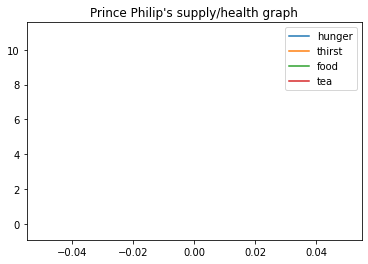

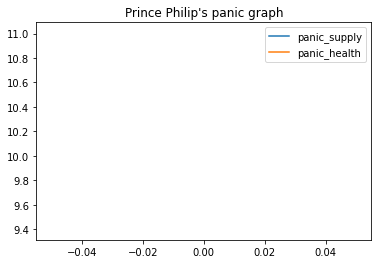

 
 Lino's Performance  

5
5
% Explored : Consume =  100.0


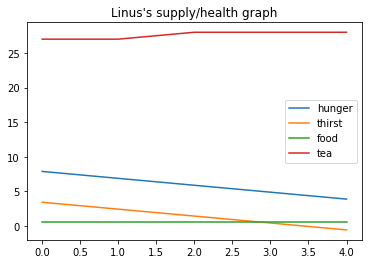

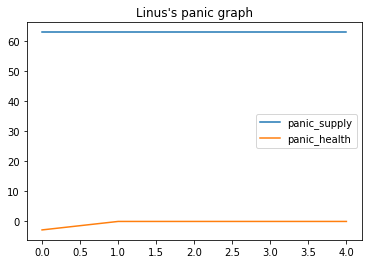

 
 Adrien's Performance  

10
10
% Explored : Consume =  100.0


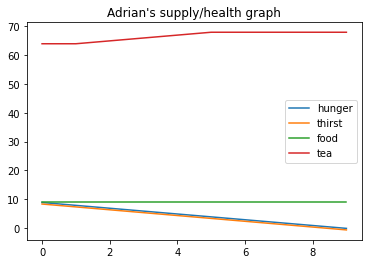

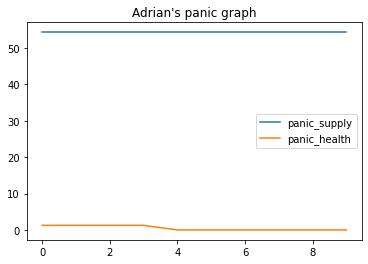

 
 Damo's Performance  

5
5
% Explored : Consume =  0.0


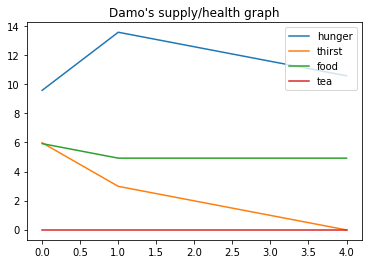

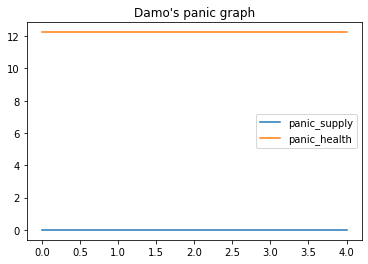

tensor([100.,   8.,   0.,   1.,   7.,  11.,   9.,   9.])
Prince Philip 's Init Panic levels:  tensor([-4.8964, -4.6889,  4.9996, -4.4310, -5.0000, -4.9268,  4.9920,  4.8304,
         4.9980, -3.7762, -4.5607,  4.9999, -4.9950,  4.9487, -4.9231,  4.3056,
         4.9262], grad_fn=<MulBackward0>)
tensor([100.,   9.,   9.,   1.,   8.,  68.,   1.,   9.])
Adrian 's Init Panic levels:  tensor([ 4.9988,  5.0000,  4.9927,  4.9986,  4.9784,  5.0000, -4.9416, -4.8532,
        -5.0000, -4.9739,  4.9996, -4.9986,  4.8333,  4.9975, -4.5558, -3.8411,
        -4.9923], grad_fn=<MulBackward0>)
tensor([100.,   5.,   8.,   1.,   6.,   0.,   7.,   3.])
Damo 's Init Panic levels:  tensor([-4.9674,  4.9999, -4.8352, -4.9991, -4.9316,  4.9884, -4.9663,  5.0000,
         4.8290, -4.9023, -4.9387,  4.9997,  4.8836,  4.9999,  4.8120,  4.9999,
        -4.9461], grad_fn=<MulBackward0>)
tensor([100.,   8.,   4.,   1.,   0.,  28.,   7.,   9.])
Linus 's Init Panic levels:  tensor([-5.0000,  4.9944, -4.4950, -4.9775

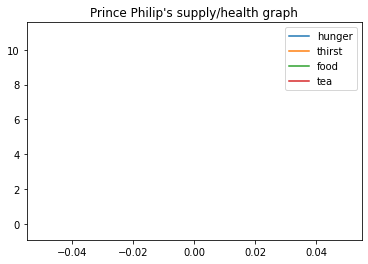

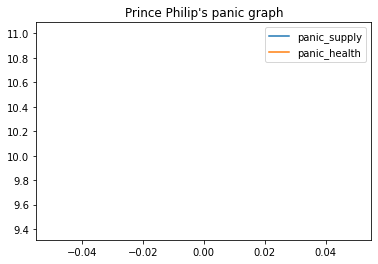

 
 Lino's Performance  

5
5
% Explored : Consume =  100.0


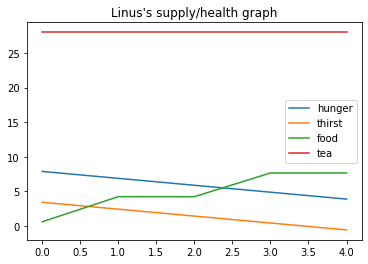

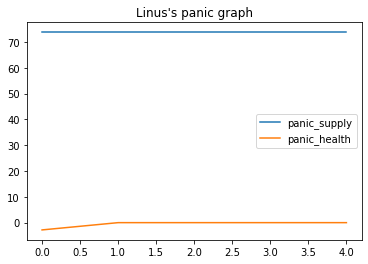

 
 Adrien's Performance  

10
10
% Explored : Consume =  100.0


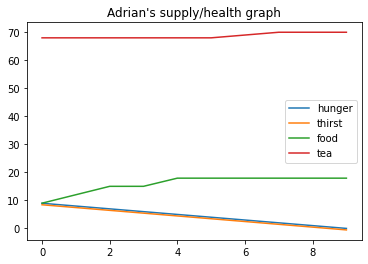

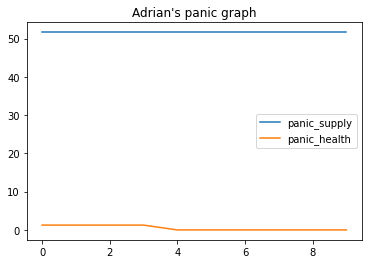

 
 Damo's Performance  

5
5
% Explored : Consume =  0.0


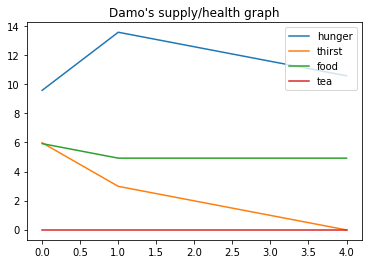

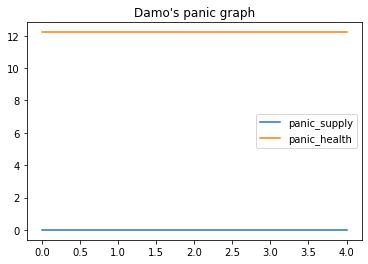

tensor([100.,   8.,   0.,   1.,   7.,  11.,   9.,   9.])
Prince Philip 's Init Panic levels:  tensor([-4.8992, -4.7098,  4.9996, -4.4707, -5.0000, -4.9280,  4.9920,  4.8325,
         4.9981, -3.9755, -4.5960,  4.9999, -4.9949,  4.9483, -4.9240,  4.3185,
         4.9250], grad_fn=<MulBackward0>)
tensor([100.,   9.,   9.,   1.,   8.,  71.,   1.,   9.])
Adrian 's Init Panic levels:  tensor([ 4.9990,  5.0000,  4.9937,  4.9989,  4.9818,  5.0000, -4.9475, -4.8665,
        -5.0000, -4.9809,  4.9997, -4.9987,  4.8274,  4.9977, -4.4383, -4.2498,
        -4.9925], grad_fn=<MulBackward0>)
tensor([100.,   5.,   8.,   1.,   6.,   0.,   7.,   3.])
Damo 's Init Panic levels:  tensor([-4.9682,  4.9999, -4.8501, -4.9991, -4.9352,  4.9885, -4.9667,  5.0000,
         4.8322, -4.9141, -4.9430,  4.9997,  4.8859,  4.9999,  4.8151,  4.9999,
        -4.9499], grad_fn=<MulBackward0>)
tensor([100.,   8.,   4.,   1.,   0.,  29.,   7.,   9.])
Linus 's Init Panic levels:  tensor([-5.0000,  4.9947, -4.5147, -4.9786

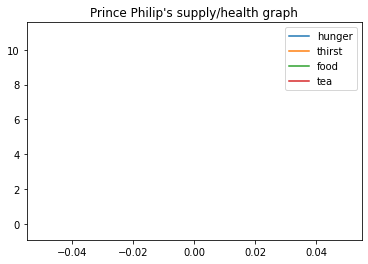

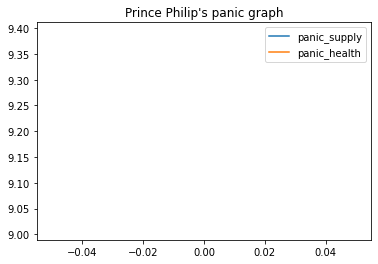

 
 Lino's Performance  

5
5
% Explored : Consume =  100.0


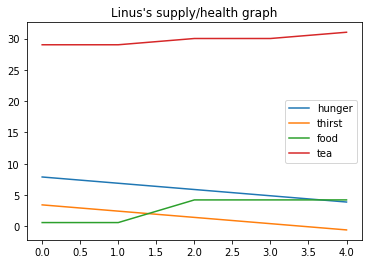

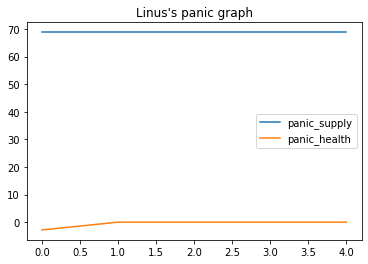

 
 Adrien's Performance  

10
10
% Explored : Consume =  100.0


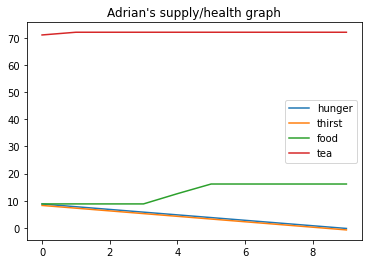

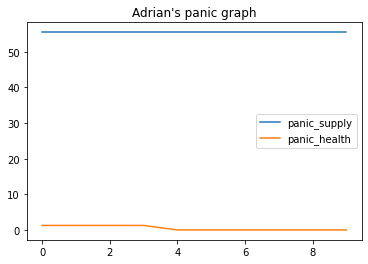

 
 Damo's Performance  

5
5
% Explored : Consume =  0.0


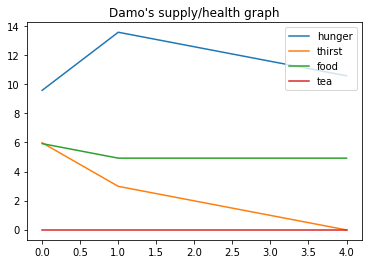

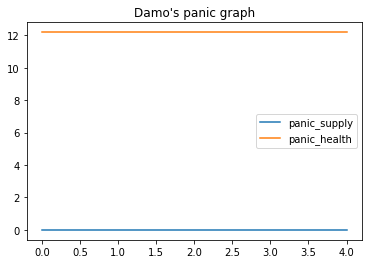

tensor([100.,   8.,   0.,   1.,   7.,  12.,   9.,   9.])
Prince Philip 's Init Panic levels:  tensor([-4.9090, -4.7197,  4.9997, -4.4948, -5.0000, -4.9307,  4.9910,  4.8344,
         4.9980, -4.1467, -4.6280,  4.9999, -4.9954,  4.9540, -4.9186,  4.3232,
         4.9272], grad_fn=<MulBackward0>)
tensor([100.,   9.,   9.,   1.,   8.,  73.,   1.,   9.])
Adrian 's Init Panic levels:  tensor([ 4.9992,  5.0000,  4.9943,  4.9991,  4.9838,  5.0000, -4.9509, -4.8863,
        -5.0000, -4.9856,  4.9998, -4.9988,  4.8240,  4.9978, -4.4235, -4.4631,
        -4.9928], grad_fn=<MulBackward0>)
tensor([100.,   5.,   8.,   1.,   6.,   0.,   7.,   3.])
Damo 's Init Panic levels:  tensor([-4.9689,  4.9999, -4.8625, -4.9991, -4.9383,  4.9886, -4.9671,  5.0000,
         4.8352, -4.9233, -4.9467,  4.9997,  4.8879,  4.9999,  4.8181,  4.9999,
        -4.9532], grad_fn=<MulBackward0>)
tensor([100.,   8.,   4.,   1.,   0.,  31.,   7.,   9.])
Linus 's Init Panic levels:  tensor([-5.0000,  4.9954, -4.5173, -4.9783

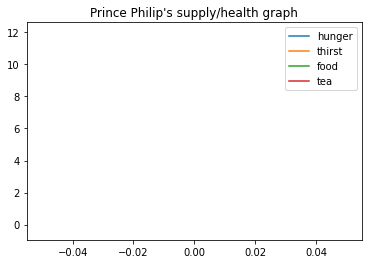

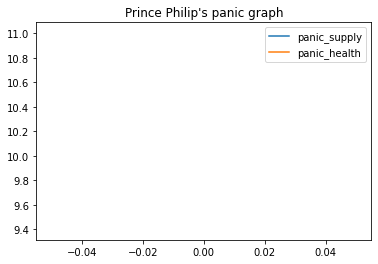

 
 Lino's Performance  

5
5
% Explored : Consume =  100.0


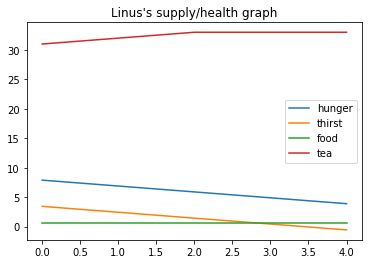

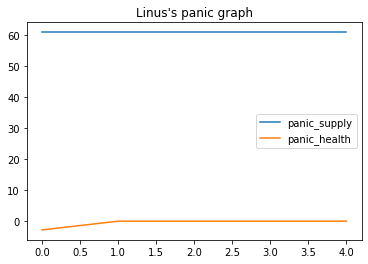

 
 Adrien's Performance  

10
10
% Explored : Consume =  100.0


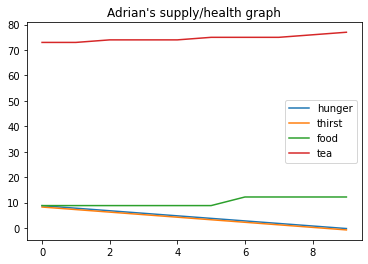

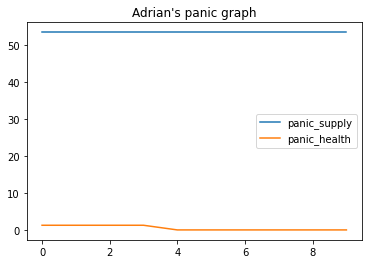

 
 Damo's Performance  

5
5
% Explored : Consume =  0.0


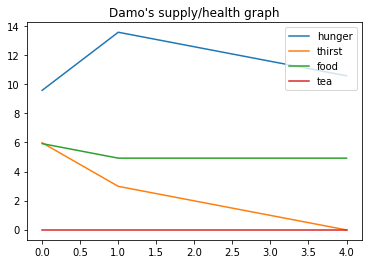

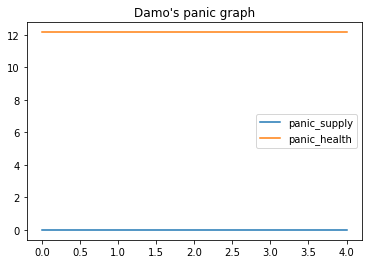

tensor([100.,   8.,   0.,   1.,   7.,  12.,   9.,   9.])
Prince Philip 's Init Panic levels:  tensor([-4.9112, -4.7366,  4.9997, -4.5278, -5.0000, -4.9317,  4.9910,  4.8363,
         4.9980, -4.2614, -4.6539,  4.9999, -4.9954,  4.9537, -4.9198,  4.3358,
         4.9262], grad_fn=<MulBackward0>)
tensor([100.,   9.,   9.,   1.,   8.,  77.,   1.,   9.])
Adrian 's Init Panic levels:  tensor([ 4.9994,  5.0000,  4.9949,  4.9993,  4.9881,  5.0000, -4.9549, -4.9130,
        -5.0000, -4.9883,  4.9998, -4.9990,  4.8198,  4.9979, -4.2633, -4.6636,
        -4.9930], grad_fn=<MulBackward0>)
tensor([100.,   5.,   8.,   1.,   6.,   0.,   7.,   3.])
Damo 's Init Panic levels:  tensor([-4.9696,  4.9999, -4.8731, -4.9991, -4.9412,  4.9887, -4.9675,  5.0000,
         4.8380, -4.9308, -4.9499,  4.9997,  4.8898,  4.9999,  4.8211,  4.9999,
        -4.9561], grad_fn=<MulBackward0>)
tensor([100.,   8.,   4.,   1.,   0.,  33.,   7.,   9.])
Linus 's Init Panic levels:  tensor([-5.0000,  4.9961, -4.5363, -4.9774

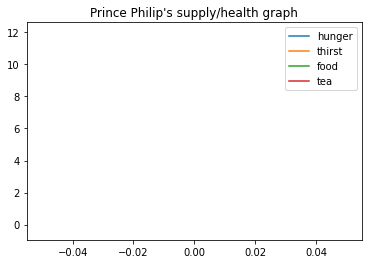

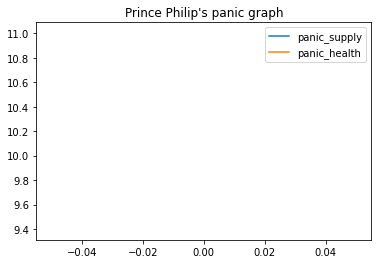

 
 Lino's Performance  

5
5
% Explored : Consume =  100.0


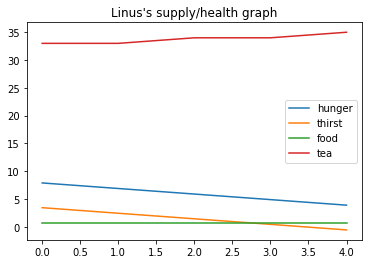

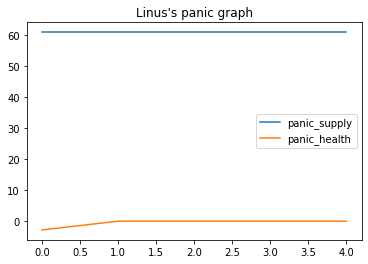

 
 Adrien's Performance  

10
10
% Explored : Consume =  100.0


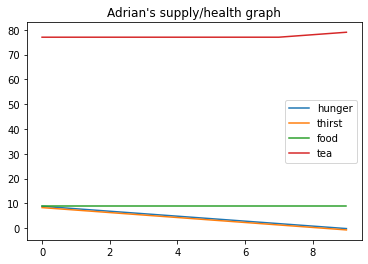

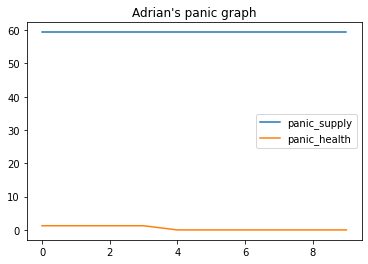

 
 Damo's Performance  

5
5
% Explored : Consume =  0.0


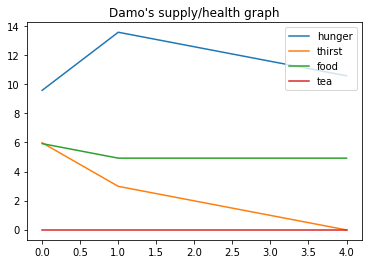

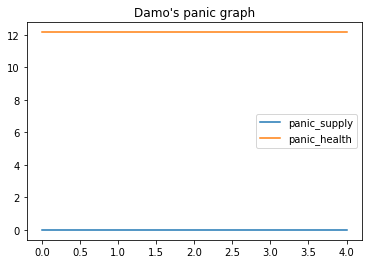

tensor([100.,   8.,   0.,   1.,   7.,  12.,   9.,   9.])
Prince Philip 's Init Panic levels:  tensor([-4.9132, -4.7516,  4.9997, -4.5571, -5.0000, -4.9326,  4.9910,  4.8382,
         4.9980, -4.3519, -4.6767,  4.9999, -4.9954,  4.9535, -4.9210,  4.3479,
         4.9254], grad_fn=<MulBackward0>)
tensor([100.,   9.,   9.,   1.,   8.,  79.,   1.,   9.])
Adrian 's Init Panic levels:  tensor([ 4.9995,  5.0000,  4.9950,  4.9994,  4.9899,  5.0000, -4.9582, -4.9375,
        -5.0000, -4.9902,  4.9998, -4.9991,  4.8163,  4.9979, -4.3460, -4.7368,
        -4.9934], grad_fn=<MulBackward0>)
tensor([100.,   5.,   8.,   1.,   6.,   0.,   7.,   3.])
Damo 's Init Panic levels:  tensor([-4.9702,  4.9999, -4.8821, -4.9991, -4.9439,  4.9888, -4.9680,  5.0000,
         4.8406, -4.9370, -4.9528,  4.9997,  4.8916,  4.9999,  4.8240,  4.9999,
        -4.9586], grad_fn=<MulBackward0>)
tensor([100.,   8.,   4.,   1.,   0.,  35.,   7.,   9.])
Linus 's Init Panic levels:  tensor([-5.0000,  4.9966, -4.5675, -4.9767

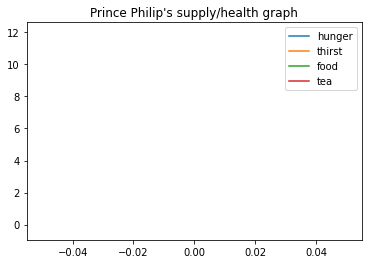

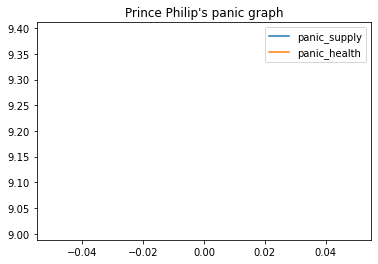

 
 Lino's Performance  

5
5
% Explored : Consume =  100.0


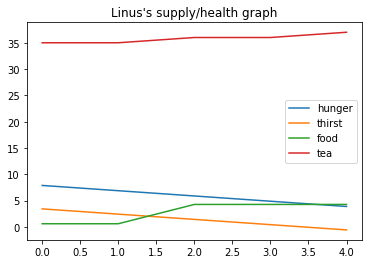

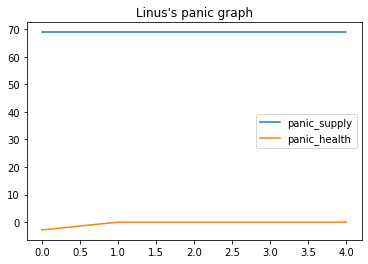

 
 Adrien's Performance  

10
10
% Explored : Consume =  100.0


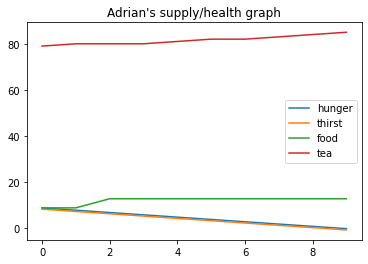

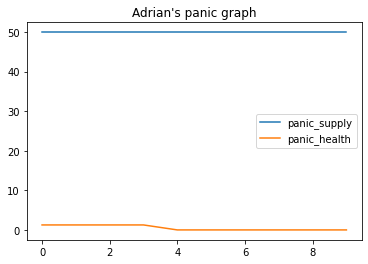

 
 Damo's Performance  

5
5
% Explored : Consume =  0.0


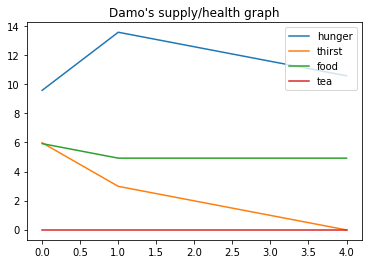

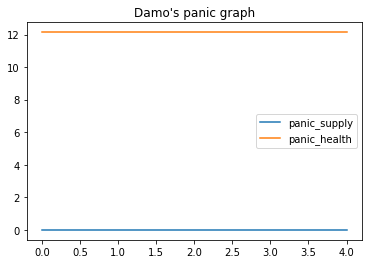

tensor([100.,   8.,   0.,   1.,   7.,  12.,   9.,   9.])
Prince Philip 's Init Panic levels:  tensor([-4.9152, -4.7623,  4.9997, -4.5822, -5.0000, -4.9338,  4.9910,  4.8398,
         4.9980, -4.4104, -4.6942,  4.9999, -4.9954,  4.9533, -4.9222,  4.3592,
         4.9247], grad_fn=<MulBackward0>)
tensor([100.,   9.,   9.,   1.,   8.,  85.,   1.,   9.])
Adrian 's Init Panic levels:  tensor([ 4.9997,  5.0000,  4.9957,  4.9996,  4.9947,  5.0000, -4.9611, -4.9485,
        -5.0000, -4.9907,  4.9999, -4.9991,  4.7971,  4.9980, -3.9848, -4.8362,
        -4.9925], grad_fn=<MulBackward0>)
tensor([100.,   5.,   8.,   1.,   6.,   0.,   7.,   3.])
Damo 's Init Panic levels:  tensor([-4.9708,  4.9999, -4.8900, -4.9991, -4.9462,  4.9889, -4.9684,  5.0000,
         4.8431, -4.9422, -4.9554,  4.9997,  4.8933,  4.9999,  4.8269,  4.9999,
        -4.9609], grad_fn=<MulBackward0>)
tensor([100.,   8.,   4.,   1.,   0.,  37.,   7.,   9.])
Linus 's Init Panic levels:  tensor([-5.0000,  4.9970, -4.5995, -4.9762

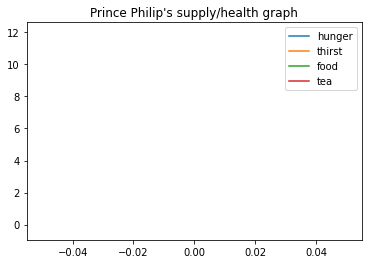

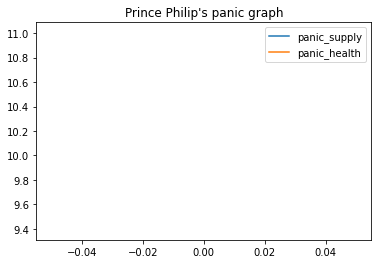

 
 Lino's Performance  

5
5
% Explored : Consume =  100.0


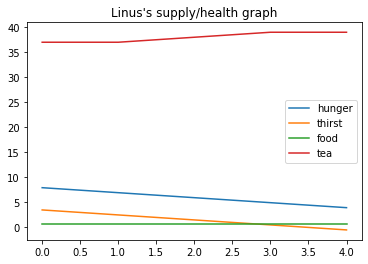

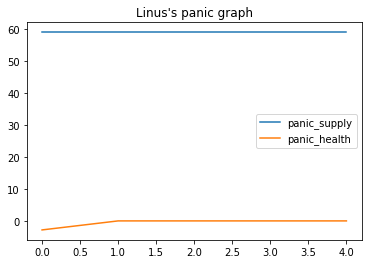

 
 Adrien's Performance  

10
10
% Explored : Consume =  100.0


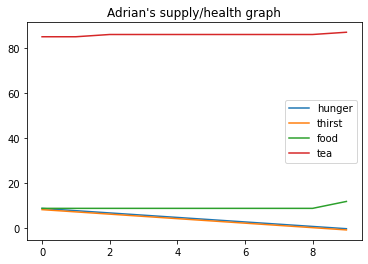

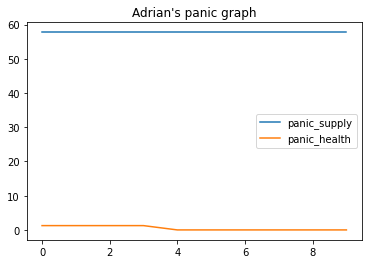

 
 Damo's Performance  

5
5
% Explored : Consume =  0.0


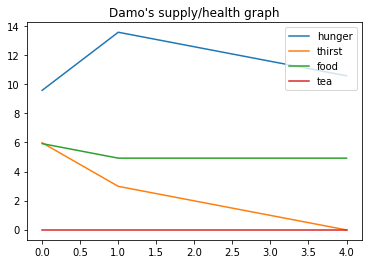

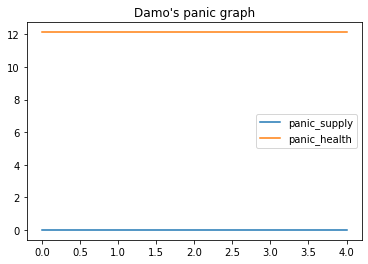

tensor([100.,   8.,   0.,   1.,   7.,  12.,   9.,   9.])
Prince Philip 's Init Panic levels:  tensor([-4.9169, -4.7744,  4.9997, -4.6053, -5.0000, -4.9347,  4.9910,  4.8416,
         4.9980, -4.4720, -4.7123,  4.9999, -4.9954,  4.9531, -4.9234,  4.3699,
         4.9239], grad_fn=<MulBackward0>)
tensor([100.,   9.,   9.,   1.,   8.,  87.,   1.,   9.])
Adrian 's Init Panic levels:  tensor([ 4.9997,  5.0000,  4.9960,  4.9997,  4.9957,  5.0000, -4.9627, -4.9613,
        -5.0000, -4.9919,  4.9999, -4.9992,  4.7935,  4.9982, -4.1970, -4.8627,
        -4.9924], grad_fn=<MulBackward0>)
tensor([100.,   5.,   8.,   1.,   6.,   0.,   7.,   3.])
Damo 's Init Panic levels:  tensor([-4.9714,  4.9999, -4.8968, -4.9991, -4.9484,  4.9890, -4.9689,  5.0000,
         4.8454, -4.9466, -4.9577,  4.9997,  4.8948,  4.9999,  4.8297,  4.9999,
        -4.9629], grad_fn=<MulBackward0>)
tensor([100.,   8.,   4.,   1.,   0.,  40.,   7.,   9.])
Linus 's Init Panic levels:  tensor([-5.0000,  4.9975, -4.6502, -4.9749

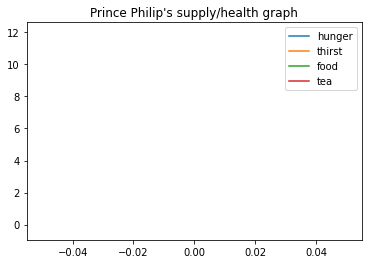

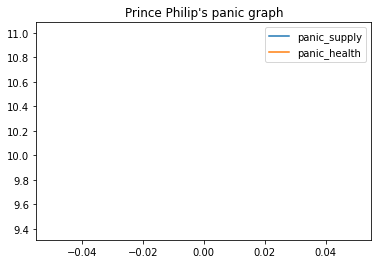

 
 Lino's Performance  

5
5
% Explored : Consume =  100.0


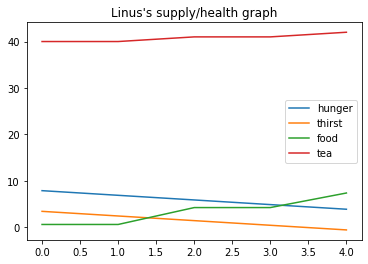

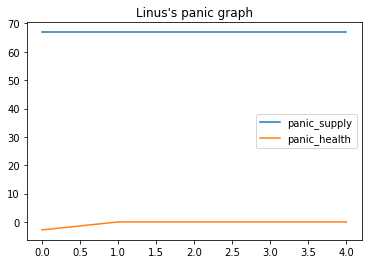

 
 Adrien's Performance  

10
10
% Explored : Consume =  100.0


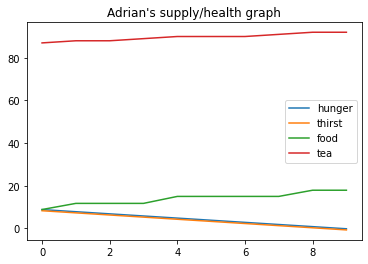

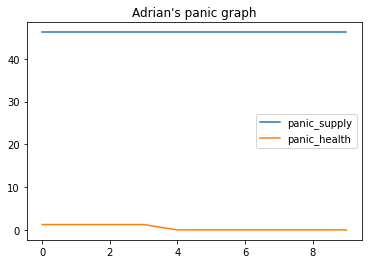

 
 Damo's Performance  

5
5
% Explored : Consume =  0.0


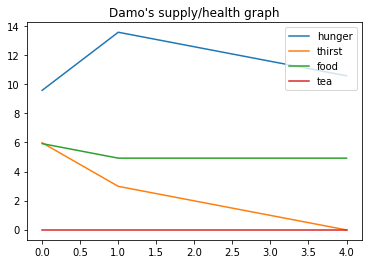

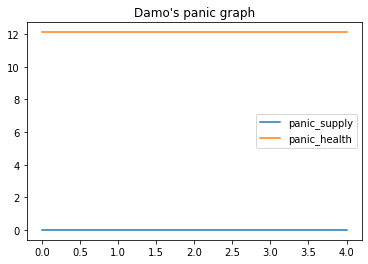

tensor([100.,   8.,   0.,   1.,   7.,  12.,   9.,   9.])
Prince Philip 's Init Panic levels:  tensor([-4.9185, -4.7854,  4.9997, -4.6262, -5.0000, -4.9355,  4.9910,  4.8434,
         4.9980, -4.5228, -4.7285,  4.9999, -4.9954,  4.9530, -4.9246,  4.3804,
         4.9231], grad_fn=<MulBackward0>)
tensor([100.,   9.,   9.,   1.,   8.,  93.,   1.,   9.])
Adrian 's Init Panic levels:  tensor([ 4.9998,  5.0000,  4.9967,  4.9998,  4.9980,  5.0000, -4.9588, -4.9674,
        -5.0000, -4.9917,  4.9999, -4.9992,  4.7647,  4.9983, -3.7520, -4.9119,
        -4.9915], grad_fn=<MulBackward0>)
tensor([100.,   5.,   8.,   1.,   6.,   0.,   7.,   3.])
Damo 's Init Panic levels:  tensor([-4.9720,  4.9999, -4.9028, -4.9991, -4.9504,  4.9891, -4.9694,  5.0000,
         4.8476, -4.9503, -4.9597,  4.9997,  4.8963,  4.9999,  4.8324,  4.9999,
        -4.9647], grad_fn=<MulBackward0>)
tensor([100.,   8.,   4.,   1.,   0.,  42.,   7.,   9.])
Linus 's Init Panic levels:  tensor([-5.0000,  4.9978, -4.6869, -4.9743

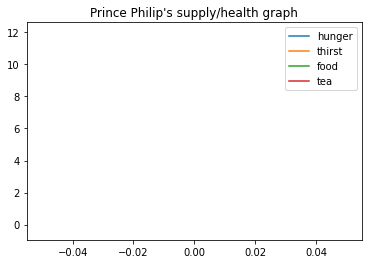

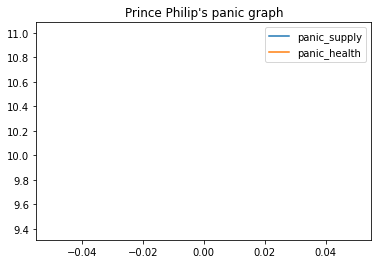

 
 Lino's Performance  

5
5
% Explored : Consume =  100.0


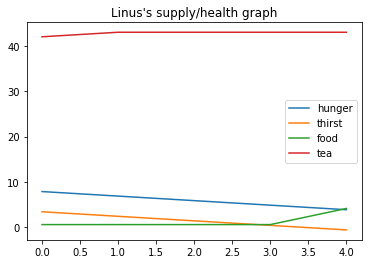

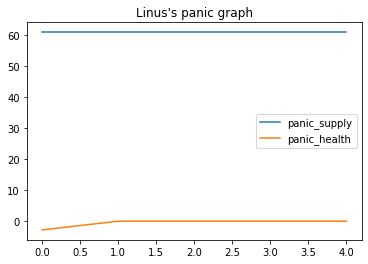

 
 Adrien's Performance  

10
10
% Explored : Consume =  100.0


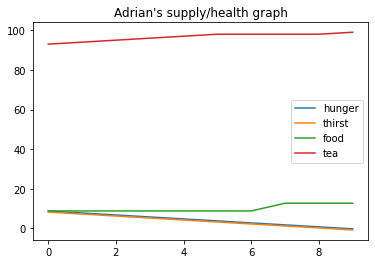

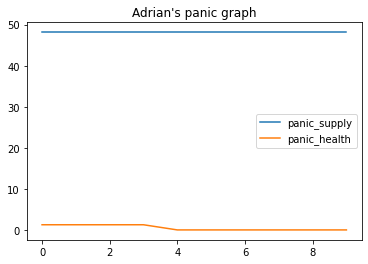

 
 Damo's Performance  

5
5
% Explored : Consume =  0.0


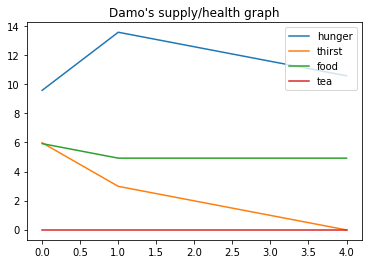

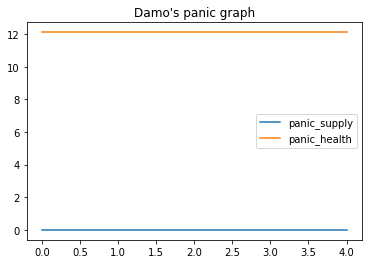

tensor([100.,   8.,   0.,   1.,   7.,  12.,   9.,   9.])
Prince Philip 's Init Panic levels:  tensor([-4.9200, -4.7953,  4.9997, -4.6451, -5.0000, -4.9363,  4.9910,  4.8450,
         4.9981, -4.5654, -4.7431,  4.9999, -4.9954,  4.9529, -4.9257,  4.3906,
         4.9225], grad_fn=<MulBackward0>)
tensor([100.,   9.,   9.,   1.,   8., 100.,   1.,   9.])
Adrian 's Init Panic levels:  tensor([ 4.9998,  5.0000,  4.9973,  4.9999,  4.9992,  5.0000, -4.9519, -4.9753,
        -5.0000, -4.9919,  4.9999, -4.9993,  4.7495,  4.9986, -3.8297, -4.9401,
        -4.9886], grad_fn=<MulBackward0>)
tensor([100.,   5.,   8.,   1.,   6.,   0.,   7.,   3.])
Damo 's Init Panic levels:  tensor([-4.9725,  4.9999, -4.9082, -4.9991, -4.9523,  4.9892, -4.9698,  5.0000,
         4.8498, -4.9536, -4.9616,  4.9997,  4.8977,  4.9999,  4.8351,  4.9999,
        -4.9664], grad_fn=<MulBackward0>)
tensor([100.,   8.,   4.,   1.,   0.,  43.,   7.,   9.])
Linus 's Init Panic levels:  tensor([-5.0000,  4.9980, -4.7176, -4.9743

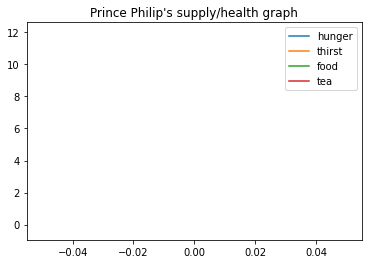

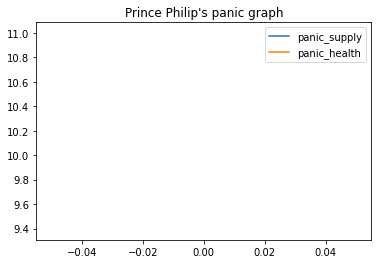

 
 Lino's Performance  

5
5
% Explored : Consume =  100.0


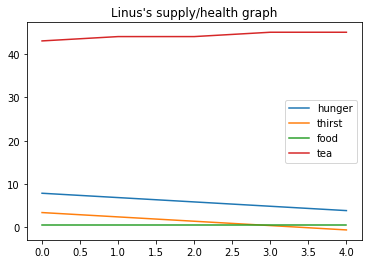

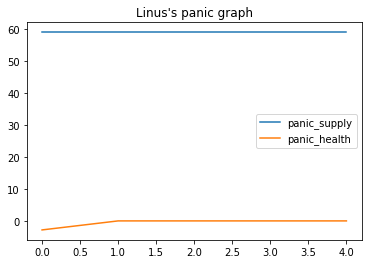

 
 Adrien's Performance  

10
10
% Explored : Consume =  100.0


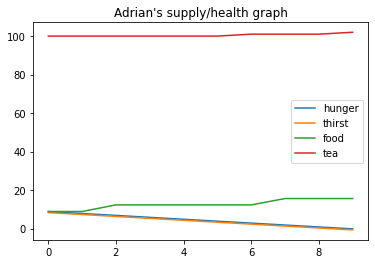

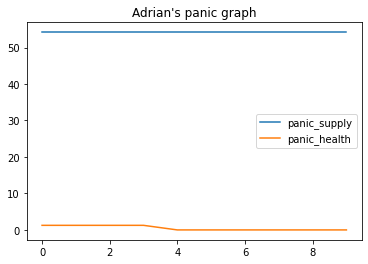

 
 Damo's Performance  

5
5
% Explored : Consume =  0.0


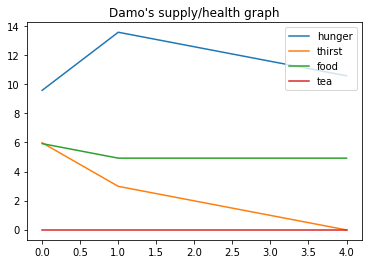

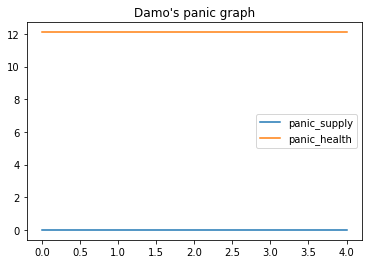

In [89]:
count = 0

while count <10:
  running()
  count += 1

In [81]:
# starting panic is too damn high
# Brain Surgery; Tan H



